In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Find d

In [80]:
#the data for He in degree
stright = 142.22
right_1 = np.array([150,150.33,150.65,150.85,152.8,153.68,154.92])
right_2 = np.array([157.62,158.5,159.37,159.5,162.67,165.67,167.08])
left_1 = np.array([134.65,134.32,133.98,133.75,132.25,130.85,130.27])
left_2 = np.array([126.95,126,125.85,125.02,121.95,119,117.53])

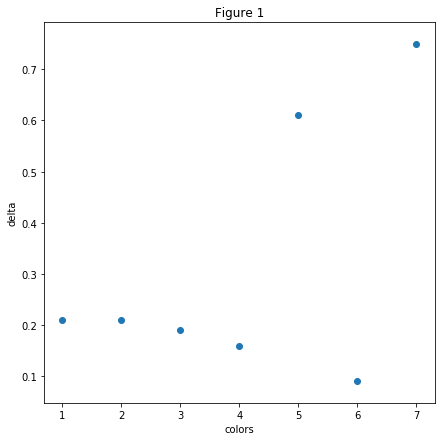

In [81]:
#find the of axis data points for first order
fig = plt.figure(figsize=(7,7))

delta_1 = (right_1-stright)-(stright-left_1)

color = np.linspace(1,7,7)
plt.scatter(color,delta_1)
plt.xlabel("colors")
plt.ylabel("delta")
plt.title("Figure 1")

plt.savefig("He-first.png")

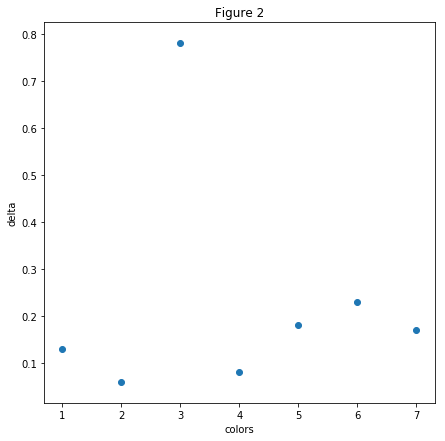

In [82]:
#find the of axis data points for second order
fig = plt.figure(figsize=(7,7))
delta_2 = (right_2-stright)-(stright-left_2)
plt.scatter(color,delta_2)
plt.xlabel("colors")
plt.ylabel("delta")
plt.title("Figure 2")

plt.savefig("He-second.png")

In [83]:
#corrected data for He in degree
stright = 142.22
r1 = np.array([150,150.33,150.65,150.85,153.68]) - stright
r2 = np.array([157.62,158.5,159.5,162.67,167.08]) - stright
l1 = stright - np.array([134.65,134.32,133.98,133.75,130.85])
l2 = stright - np.array([126.95,126,125.02,121.95,117.53])

In [84]:
#caculate error on delta, which is also the error on theta
del1 =  np.absolute((l1-r1)/2)
del2 =  np.absolute((l2-r2)/2)
theta1 = (r1+l1)/2
theta2 = (r2+l2)/2
errdel1 = np.sqrt(np.mean(del1**2))
errdel2 = np.sqrt(np.mean(del2**2))

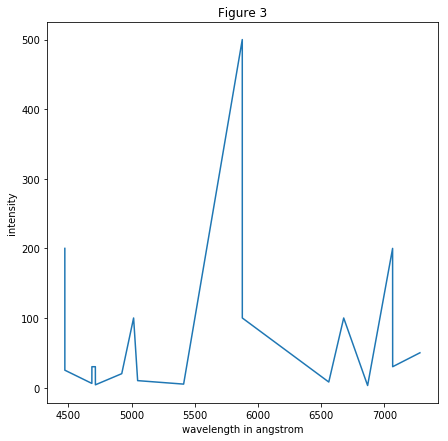

In [85]:
He_λ= np.array([4471.5,4471.7,4685.4,4685.7,4713.1,4713.4,4921.9,5015.7,5047.7,5411.52,5875.62,5875.97,6560.1,6678.2,6867.5,7065.2,7065.71,7281.35])
He_intensity = np.array([200,25,6,30,30,4,20,100,10,5,500,100,8,100,3,200,30,50])
fig = plt.figure(figsize=(7,7))
plt.plot(He_λ,He_intensity)
plt.xlabel("wavelength in angstrom")
plt.ylabel("intensity")
plt.title("Figure 3")

plt.savefig("He_spectrum.png")

In [86]:
#determine the weighted error
λ1 = np.array([447.15,469.94,492.19,501.57,667.82])
λ2 = np.array([447.15,469.94,501.57,587.58,706.52])
wi_1 = 1/(1*λ1*(np.cos(np.deg2rad(theta1)))/((np.sin(np.deg2rad(theta1)))**2)*errdel1)**2
wi_2 = 1/(2*λ2*(np.cos(np.deg2rad(theta2)))/((np.sin(np.deg2rad(theta2)))**2)*errdel2)**2

In [87]:
#caculate d in meter
di_1 = ((1*λ1)/np.sin(np.deg2rad(theta1)))
di_2 = ((2*λ2)/np.sin(np.deg2rad(theta2)))
d1 = np.sum(wi_1*di_1)/np.sum(wi_1)
d2 = np.sum(wi_2*di_2)/np.sum(wi_2)
d = (d1+d2)/2/10**9
print('average d',d)

average d 3.3742533153722445e-06


In [88]:
#find the error on d in meter
err_d1 = np.sqrt(1/np.sum(wi_1))
err_d2 = np.sqrt(1/np.sum(wi_2))
derr = np.sqrt(err_d1**2+err_d2**2)/10**9/2
print('error on d',derr)

error on d 4.514434453784597e-07


### Find Rydberg

In [89]:
#import the data
H_str = 142.33
H_r1 = np.array([149.7,150.62,153.58])-H_str
H_l1 = H_str-np.array([135,134.07,131.17])
H_r2 = np.array([157.75,159.07,165.22])-H_str
H_l2 = H_str-np.array([126.42,125.58,119.38])

In [90]:
#error on theta
H_del1 =  np.absolute((H_l1-H_r1)/2)
H_del2 =  np.absolute((H_l2-H_r2)/2)
Htheta1 = (H_r1+H_l1)/2
Htheta2 = (H_r2+H_l2)/2
err1 = np.sqrt(np.mean(H_del1**2))
err2 = np.sqrt(np.mean(H_del2**2))

In [91]:
#find error due to theta on Ri
n = np.array([6,4,3])
Ri_1 = 1/(1/4-1/(n**2)) / (d * np.sin(np.deg2rad(Htheta1)))
theta_errRi_1 = np.array(err1 * (1/(1/4-1/(n**2)))* np.cos(np.deg2rad(Htheta1)) / (d * (np.sin(np.deg2rad(Htheta1)))**2))

In [92]:
#find best estimate of R from theta error
wi_1 = 1/(theta_errRi_1**2)
R1 = np.sum(wi_1*Ri_1)/np.sum(wi_1)

print("best estimated RH from first order:",R1,"m^-1")

best estimated RH from first order: 10850990.904904015 m^-1


In [93]:
#find error on R1 and R2 due to theta
theta_R1err = np.sqrt(1/np.sum(wi_1))

#find prectange error on R1 and R2
prectange_R1err = np.sqrt((theta_R1err/R1)**2 + (derr/d)**2)
R1err = prectange_R1err * R1
print("error on RH from first order:",R1err,"m^-1")

error on RH from first order: 1859680.9700218183 m^-1


### Helium - Neon Laser

In [94]:
Ne_stright = 142.37
Ne_r = 153.18 - Ne_stright
Ne_l = Ne_stright - 131.53

Ne_del =  np.absolute((Ne_r-Ne_l)/2)
Netheta = (Ne_r+Ne_l)/2
Ne_err = np.sqrt(np.mean(Ne_del**2))

m = 1
Ne_λerr = np.sqrt((Ne_err*d*np.cos(np.deg2rad(Netheta))/m)**2 + (derr*np.sin(np.deg2rad(Netheta))/m)**2)
Ne_λ= d*np.sin(np.deg2rad(Netheta))/m

print("wavelength of the closest line with error", Ne_λ*10**10,"+-",Ne_λerr*10**10)

wavelength of the closest line with error 6337.181790941673 +- 982.8522903077944
